# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [4]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = test_set.class_names
print(class_name)


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [6]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')


d:\DEV\Artificial Intelligence\PROJECTS\PlantDiseaseProject-1\plantenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Visualising and Performing Prediction on Single image

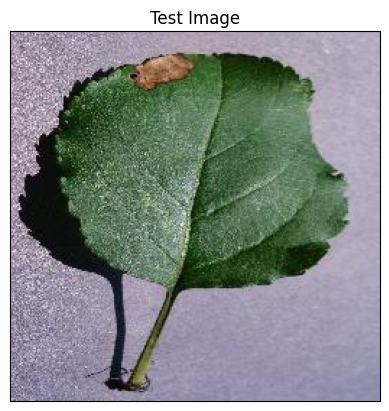

In [9]:
import cv2
image_path = 'test/Apple___Black_rot/1cdac481-1275-4228-a2ca-e3deaf268ffc___JR_FrgE.S 2897.JPG'

img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


## Testing Model

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [ ]:
predictions = cnn.predict(input_arr)


In [15]:
predictions


array([[6.9660628e-09, 9.9972290e-01, 7.3116331e-12, 1.9477333e-04,
        2.9110685e-09, 2.5701561e-09, 5.1750305e-07, 9.1559565e-11,
        1.2323530e-10, 1.2496049e-11, 2.7583808e-12, 1.1236240e-08,
        1.9734316e-09, 1.3356337e-10, 9.9160049e-09, 2.0605018e-11,
        2.7293059e-10, 4.5998712e-09, 5.6175548e-07, 3.4137374e-05,
        2.7087297e-09, 8.8420926e-10, 3.8255492e-09, 2.1015946e-11,
        2.3357334e-06, 3.4150786e-11, 4.8899923e-10, 4.0601113e-11,
        8.8536356e-10, 1.4968816e-05, 9.8820001e-09, 6.8941731e-08,
        1.5587893e-05, 1.8505149e-09, 1.4112239e-05, 3.1691213e-13,
        5.4767085e-10, 3.3825017e-08]], dtype=float32)

In [14]:
result_index = np.argmax(predictions)
print(result_index)


1


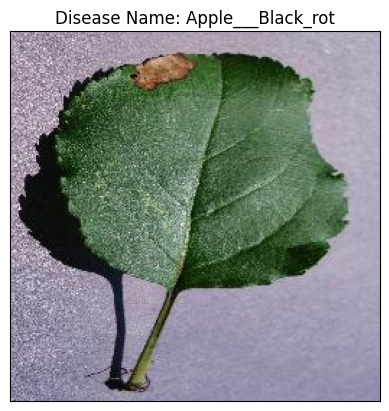

In [13]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
